[ 3.4200e-01  6.1800e-01  6.7196e+01  8.2083e+01 -2.6194e+01 -2.7500e-01
  4.5000e-02]
[[ 0.    -0.     0.    -0.    -0.     0.    -0.   ]
 [-0.     0.    -0.    -0.     0.     0.    -0.   ]
 [ 0.    -0.     0.    -0.    -0.    -0.    -0.   ]
 [-0.    -0.    -0.     0.     0.     0.     0.   ]
 [-0.     0.    -0.     0.     0.002  0.     0.   ]
 [ 0.     0.    -0.     0.     0.     0.     0.   ]
 [-0.    -0.    -0.     0.     0.     0.     0.   ]]


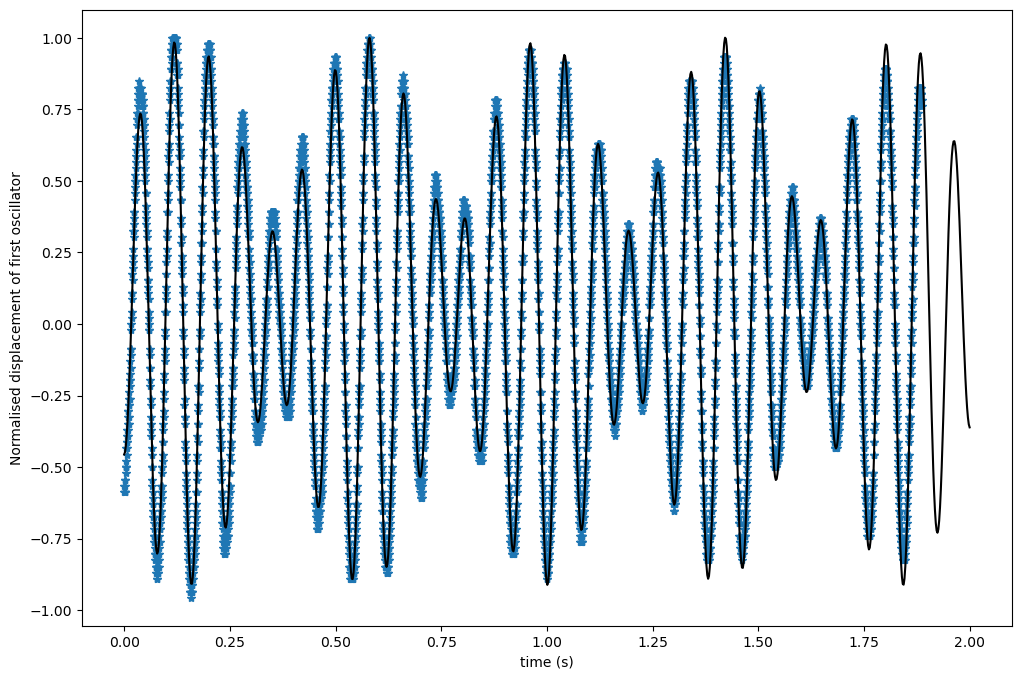

[[ 9.30186614e-07 -4.78033372e-08  1.21481022e-08 -2.76634173e-08
  -7.38731245e-09  3.81775904e-10 -4.76341659e-09]
 [-4.78033372e-08  9.23949385e-07 -2.79998904e-08 -1.23212634e-08
   7.74649808e-07  9.25116877e-09 -1.22103130e-10]
 [ 1.21481022e-08 -2.79998904e-08  2.74592247e-05 -2.62176048e-06
  -1.99930044e-04 -2.47558819e-06 -7.75013390e-08]
 [-2.76634173e-08 -1.23212634e-08 -2.62176048e-06  8.55376084e-06
   6.51533347e-05  9.20836094e-07  7.98369615e-09]
 [-7.38731244e-09  7.74649808e-07 -1.99930044e-04  6.51533347e-05
   2.01557691e-03  2.56811049e-05  5.55211607e-07]
 [ 3.81775904e-10  9.25116877e-09 -2.47558819e-06  9.20836094e-07
   2.56811049e-05  3.28834377e-07  7.08429706e-09]
 [-4.76341659e-09 -1.22103130e-10 -7.75013390e-08  7.98369615e-09
   5.55211607e-07  7.08429706e-09  4.62683259e-07]]


In [28]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from uncertainties import ufloat

def oscillator(t, A, B, omega_plus, omega_minus, phi, d, C):
    return A*np.cos(omega_plus*(t-d)+phi) + B*np.cos(omega_minus*(t-d)+phi) + C



    # figure, axis = plt.subplots(10, 5, figsize=(20, 20))


    # for j in range(1, 51):
filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/MS_END/ALL0001.CSV'
data = np.genfromtxt(filename, skip_header=300, delimiter=',')
# print(data)
# new_data = []
# for i in range(len(data)):
#     values = data[i].split(',')
#     values = [v.replace(' ', '') for v in values]
#     values = [v for v in values if v]
#     for v in values:
#         new_data.append(float(v))
# new_data = np.array(new_data)
# new_data = new_data.reshape(4718, 4)

t1 = data[:, 0] # first wave
# t1_error = 0.0004 # Sampling period of oscilloscope
# t1_with_error = [ufloat(t1, t1_error) for t1 in t1]
# print(t1_with_error)
t1 = t1 - t1[0]
y1 = data[:, 1] # first wave
y1 = y1 / np.max(y1)
t2 = data[:, 2] # second wave
t2 = t2 - t2[0]
y2 = data[:, 3] # second wave
y2 = y2 / np.max(y2)
# print(y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, p0=(-0.312993,-0.635147,66.882,81.901,-29.5379,-0.322193,0.0436574), maxfev=1000000)
popt2, pcov2 = curve_fit(oscillator, t2, y2, p0=(0.518233,0.253858,80.3644, 99.8406,290.47,13.5511, 0.0261785), maxfev=1000000)
popt1_round = np.round(popt1, decimals=3)
pcov1_round = np.round(pcov1, decimals=3)


print(popt1_round)
print(pcov1_round)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
A_1 = abs(A_1)
B_1 = abs(B_1)
A_2 = abs(A_2)
B_2 = abs(B_2)
# print(popt1)
# Should the constants be always positive? TODO
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
plt.figure(figsize=(12,8))    
plt.plot(t1, y1, '*')
plt.plot(curve_t1, curve_y1, 'black')

plt.xlabel('time (s)')
plt.ylabel(f'Normalised displacement of first oscillator')
plt.savefig(f"endsem1.png",dpi=300)
plt.show()
print(pcov1)
def sine(t, A, omega, phi, C):
    return A*np.sin(omega*t+phi) + C





        
      